In [353]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [359]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

# Investigating Profile Views
1. Age : compare viewed profiles/viewers of profiles/all users, on age dimension
2. Region : compare viewed profiles/viewers of profiles/all users, on region dimension
3. external views

## 1. Age Comparison

In [456]:
# All users:
users = pd.read_csv('./output/all_users.csv')

# Users who's profile was viewed
viewed = pd.read_csv("./output/viewed_segmentation.csv")

# Users who viewed a profile
viewer = pd.read_csv('./output/viewer_segmentation.csv')

# Users who's profile was viewed from and external source
ext_viewed = pd.read_csv('./output/external_profile_views.csv')

users['dummy'] = 1
viewed['dummy'] = 1
viewer['dummy'] = 1

In [436]:
def age_group(row):
    if row['age'] >= 80:
        return "80+"
    if row['age'] >= 70:
        return "70-79"
    if row['age'] >= 60:
        return "60-69"
    if row['age'] >= 50:
        return "50-59"
    if row['age'] >= 40:
        return "40-49"
    if row['age'] >= 30:
        return "30-39"
    return "20-29"

In [437]:
# Create age_group column

users['age_group'] = users.apply(age_group, axis=1)
viewed['age_group'] = viewed.apply(age_group, axis=1)
viewer['age_group'] = viewer.apply(age_group, axis=1)
ext_viewed['age_group'] = ext_viewed.apply(age_group, axis=1)

In [376]:
# Group data by age group

user_age_group = users.loc[:, ['age_group', 'dummy']].groupby('age_group')
user_age_group_df = user_age_group.aggregate(sum)
user_age_group_df = user_age_df.reset_index()

viewed_age_group = viewed.loc[:, ['age_group', 'dummy']].groupby('age_group')
viewed_age_group_df = viewed_age_group.aggregate(sum)
viewed_age_group_df = viewed_age_group_df.reset_index()

viewer_age_group = viewer.loc[:, ['age_group', 'dummy']].groupby('age_group')
viewer_age_group_df = viewer_age_group.aggregate(sum)
viewer_age_group_df = viewer_age_group_df.reset_index()

ext_viewed_age_group = ext_viewed.loc[:, ['age_group', 'upv']].groupby('age_group')
ext_viewed_age_group_df = ext_viewed_age_group.aggregate(sum)
ext_viewed_age_group_df.reset_index(inplace=True)

In [378]:
# Creage age_group_percent column

user_age_group_df['pct_of_sample'] = round(user_age_group_df.dummy / user_age_group_df.dummy.sum(), 2)
viewed_age_group_df['pct_of_sample'] = round(viewed_age_group_df.dummy / viewed_age_group_df.dummy.sum(), 2)
viewer_age_group_df['pct_of_sample'] = round(viewer_age_group_df.dummy / viewer_age_group_df.dummy.sum(), 2)
ext_viewed_age_group_df['pct_of_sample'] = round(ext_viewed_age_group_df.upv / ext_viewed_age_group_df.upv.sum(), 2)

In [379]:
# Drop dummy field

user_age_group_df.drop('dummy', axis=1, inplace=True)
viewed_age_group_df.drop('dummy', axis=1, inplace=True)
viewer_age_group_df.drop('dummy', axis=1, inplace=True)
ext_viewed_age_group_df.drop('upv', axis=1, inplace=True)

In [380]:
# Add sample field, which will indicate which sample the metric comes from

user_age_group_df['sample'] = 'user'
viewed_age_group_df['sample'] = 'viewed'
viewer_age_group_df['sample'] = 'viewer'
ext_viewed_age_group_df['sample'] = 'ext_viewed'

In [393]:
# Create combined DataFrame for plotting

combined_age_group = pd.DataFrame(columns=['age_group', 'sample', 'pct_of_sample'])
combined_age_group = pd.concat([combined_age_group, user_age_group_df], axis=0)
combined_age_group = pd.concat([combined_age_group, viewed_age_group_df], axis=0)
combined_age_group = pd.concat([combined_age_group, ext_viewed_age_group_df], axis=0)
combined_age_group = pd.concat([combined_age_group, viewer_age_group_df], axis=0)
combined_age_group.drop('index', inplace=True, axis=1)

pct_of_sample                    
sample       ext_viewed  user viewed viewer
age_group                                  
20-29              0.48  0.48   0.51   0.48
30-39              0.21  0.21   0.18   0.21
40-49              0.08  0.08   0.08   0.08
50-59              0.05  0.05   0.04   0.05
60-69              0.16  0.16   0.16   0.15
70-79              0.02  0.02   0.02   0.02
80+                0.01  0.01   0.01   0.01

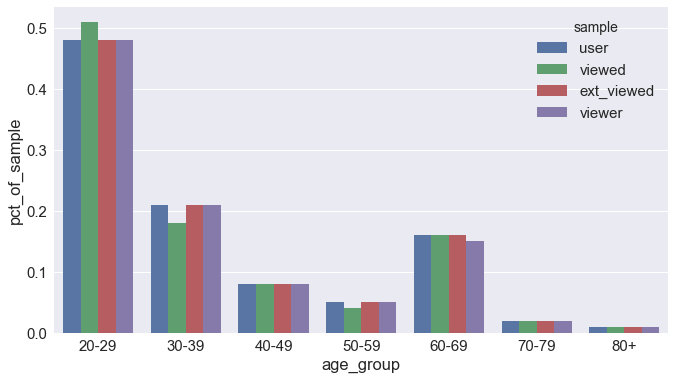

In [394]:
# Results for Age comparison

dims = (11, 6)
fig, ax = plt.subplots(figsize=dims)

sns.barplot(x="age_group", y='pct_of_sample', hue='sample', data=combined_age_group);
pd.pivot_table(combined_age_group,index=["age_group"],values=["pct_of_sample"],
               columns=["sample"],fill_value=0)

#### Distribution of ages in each sample.
- users are skewed towards younger age groups with a spike in 60-69 group
- profiles viewed distribution is slightly skewed younger compared to all users
- viewers of profiles do not vary from the all users distribution




# 2. Region Comparison

In [397]:
# Group data by region

user_region = users.loc[:, ['region', 'dummy']].groupby('region')
user_region_df = user_region.aggregate(sum)
user_region_df = user_region_df.reset_index()

viewed_region = viewed.loc[:, ['region', 'dummy']].groupby('region')
viewed_region_df = viewed_region.aggregate(sum)
viewed_region_df = viewed_region_df.reset_index()

viewer_region = viewer.loc[:, ['region', 'dummy']].groupby('region')
viewer_region_df = viewer_region.aggregate(sum)
viewer_region_df = viewer_region_df.reset_index()

ext_viewed_region = ext_viewed.loc[:, ['region', 'upv']].groupby('region')
ext_viewed_region_df = ext_viewed_region.aggregate(sum)
ext_viewed_region_df.reset_index(inplace=True)

In [399]:
# Creage percent column

user_region_df['pct_of_sample'] = round(user_region_df.dummy / user_region_df.dummy.sum(), 2)
viewed_region_df['pct_of_sample'] = round(viewed_region_df.dummy / viewed_region_df.dummy.sum(), 2)
viewer_region_df['pct_of_sample'] = round(viewer_region_df.dummy / viewer_region_df.dummy.sum(), 2)
ext_viewed_region_df['pct_of_sample'] = round(ext_viewed_region_df.upv / ext_viewed_region_df.upv.sum(), 2)

In [400]:
# Add sample field, which will indicate which sample the metric comes from

user_region_df['sample'] = 'user'
viewed_region_df['sample'] = 'viewed'
viewer_region_df['sample'] = 'viewer'
ext_viewed_region_df['sample'] = 'ext_viewed'

In [401]:
# Create combined DataFrame for plotting

combined_region = pd.DataFrame(columns=['region', 'sample', 'pct_of_sample'])
combined_region = pd.concat([combined_region, user_region_df], axis=0)
combined_region = pd.concat([combined_region, viewed_region_df], axis=0)
combined_region = pd.concat([combined_region, ext_viewed_region_df], axis=0)
combined_region = pd.concat([combined_region, viewer_region_df], axis=0)

pct_of_sample                    
sample       ext_viewed  user viewed viewer
region                                     
Midwest            0.22  0.22   0.27   0.22
Northeast          0.25  0.25   0.26   0.25
Other              0.11  0.11   0.08   0.11
South              0.19  0.19   0.22   0.20
West               0.23  0.23   0.18   0.23

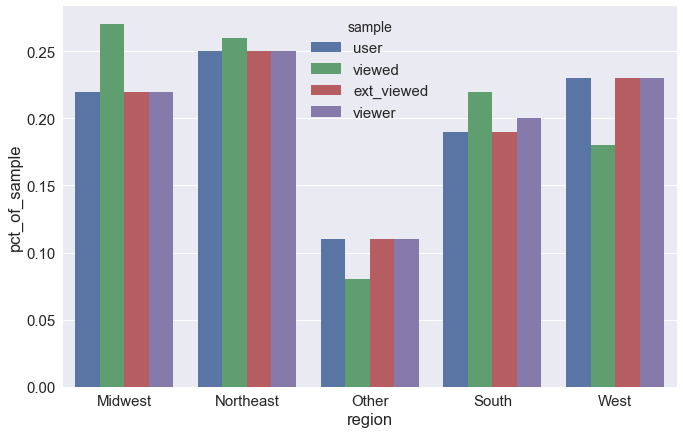

In [402]:
# Results for region comparison

dims = (11, 7)
fig, ax = plt.subplots(figsize=dims)

sns.barplot(x="region", y='pct_of_sample', hue='sample', data=combined_region);
pd.pivot_table(combined_region, index=['region'],values=["pct_of_sample"],
               columns=["sample"],fill_value=0)

#### Distribution of regions in each sample.
- viewed profiles are distributed across region differently than the sample
    - this suggests that profile region influences how often it is viewed
    - additional significance testing is needed to draw conclusions
    - if these observations are significant, I would want to gain a better understanding of why region has this affect
- other samples are distributed the same as all users


## 3. Rank of profiles by views, internal and external

In [459]:
# Group viewed table so that each user_id corresponds to a count of views

viewed_grouped = viewed.groupby('viewed_user_id')
viewed_id_df = viewed_grouped.aggregate(sum)
viewed_id_df.reset_index(inplace=True)

In [461]:
# Rename columns to make merging easier

viewed_id_df.rename(index=str, columns={'viewed_user_id': 'merge_id'}, inplace=True)
ext_viewed.rename(index=str, columns={'id':'merge_id'}, inplace=True)

In [475]:
# Outer merge as to preserve rows that have 0 external or 0 internal views

merged_views = pd.merge(viewed_id_df, ext_viewed, on='merge_id', how='outer')
merged_views.drop(['region', 'age_x', 'age_y'], axis=1, inplace=True)
merged_views.rename(index=str, columns={'dummy':'internal_views', 'upv':'external_views'}, inplace=True)
merged_views.fillna(0, inplace=True)

In [479]:

pd.merge(viewed_id_df.loc[:, ['merge_id', 'dummy']], ext_viewed.loc[:, ['merge_id', 'upv']], on='merge_id', how='inner');

In [480]:
merged_views.head()

,merge_id,internal_views,external_views
0,10058,1.0,0.0
1,10103,1.0,4.0
2,10419,2.0,3.0
3,10610,1.0,1.0
4,10702,1.0,0.0


In [481]:
merged_views.sort_values(['internal_views'], ascending=False).head(10)

,merge_id,internal_views,external_views
2312,1740253,406.0,0.0
2897,2185215,383.0,2.0
3454,2632343,180.0,0.0
3979,3086119,88.0,0.0
1670,1287442,88.0,0.0
3224,2460133,82.0,0.0
1307,979614,68.0,0.0
302,218859,67.0,1.0
456,314218,61.0,0.0
3700,2864377,47.0,3.0


In [482]:
merged_views.sort_values(['external_views'], ascending=False).head(10)

,merge_id,internal_views,external_views
185302,3172400,0.0,1124.0
169245,2871984,0.0,1124.0
186217,3197557,0.0,764.0
219656,3766973,0.0,506.0
174126,2960427,0.0,496.0
156567,2619727,0.0,431.0
118976,1933239,0.0,428.0
157530,2644348,0.0,399.0
138575,2297959,0.0,373.0
63701,999089,0.0,367.0


# Conclusion
### Insights
- age has a small influence on which profiles are viewed internally
    - slight skew towards 20-29 year old profiles when viewed from internal sources
- region influences which profiles are viewed internally
    - mid west and south drive more internal profile views
- going forward
    - look into the break down of region by age, it is likely that some regions correlate to lower age
    
### Analysis improvements
- incorperate significance testing
- analyze multi-variable data i.e. viewed profiles segmented by region and age

### Code improvements
- DRY up code

